# PROJECT - Sunlight in Austin

The Dataset is ‘NOAA_QCLCD_2011_hourly_13904.csv” it is a real-world weather and climate data from National Oceanic and Atmospheric Administration(NOAA). In this project pandas is used to manipulate the data into a usable form for analysis.

# Here I have been provided with the following:
•	The first data set(df_2010) -  'weather_data_austin_2010.csv' - Climate normal of Austin, TX from 1981-2010 from NOAA. Climate measurement each hour of the dave averaged over 30 years.
•	The second data set (df_2011) - 'NOAA_QCLCD_2011_hourly_13904.csv' - Weather data of Austin, TX from 2011. Also contains climate measurement each hour. It also has many unrelated measurements that are not needed for this project. This data needs to be cleaned up somewhat.

# In this project I will do the following:
1.	Reading in the data files
2.	Re-assigning column names
3.	Cleaning and tidying date with time-data
4.	Cleaning the numeric columns
5.	Statistical exploratory data analysis
    a.	Signal min, max, median
    b.	Signal variance
    c,	Sunny or cloudy
6.	Visual exploratory data analysis
    a.	Weekly average temperature and visibility
    b.	Daily hours of clear sky
    c.	Heat or humidity
    d.	Probability of high temperatures

# Reading in the data files

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

#Already provided string of column names for 'NOAA_QCLCD_2011_hourly_13904.csv'
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'

df_2011 = pd.read_csv ('NOAA_QCLCD_2011_hourly_13904.csv', header = None)

df_2010 = pd.read_csv ('weather_data_austin_2010.csv')

#Already provided list of column names that has no data and should be dropped from 'NOAA_QCLCD_2011_hourly_13904.csv'
list_to_drop = ['sky_conditionFlag',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag',
 'dry_bulb_celFlag',
 'wet_bulb_farenFlag',
 'wet_bulb_celFlag',
 'dew_point_farenFlag',
 'dew_point_celFlag',
 'relative_humidityFlag',
 'wind_speedFlag',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressureFlag',
 'pressure_tendencyFlag',
 'pressure_tendency',
 'presschange',
 'presschangeFlag',
 'sea_level_pressureFlag',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'record_type',
 'altimeterFlag',
 'junk']



In [52]:
df_2011.head() # Preview of the first data frame

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


In [53]:
df_2010.head() #preview of the second dataframe

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,20100101 00:00
1,44.6,37.1,1.0,20100101 01:00
2,44.1,36.9,1.0,20100101 02:00
3,43.8,36.9,1.0,20100101 03:00
4,43.5,36.8,1.0,20100101 04:00


# Re-assigning column names for the first data frame (df_2011)

In [54]:
column_labels_list = column_labels.split(',')
df_2011.columns = column_labels_list
df_2011_dropped = df_2011.drop(list_to_drop, axis = 'columns')
df_2011_dropped.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,53,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
1,13904,20110101,153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2,13904,20110101,253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
3,13904,20110101,353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
4,13904,20110101,453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


# Cleaning and tidying date time  for df_2010 in to df_2010_clean
Clean up the date and Time columns and combine them into a datetime collection to be used as the Index.

In [55]:
df_2011_dropped['date'] = df_2011_dropped['date'].astype(str)                             # Convert the date column to string
df_2011_dropped['Time'] = df_2011_dropped['Time'].apply (lambda x : '{:0>4}'.format (x))  # Add leading zeros to the Time column
date_string = df_2011_dropped['date'] + df_2011_dropped['Time']                           # Concatenate the new date and Time columns

pattern = '%Y%m%d%H%M'                                                                    # Pattern for date time

date_times = pd.to_datetime(date_string, format = pattern)                                # Convert the date_string Series to datetime

df_2011_clean = df_2011_dropped.set_index(date_times)                                     # Set the index to be the new date_times container

df_2011_clean.head()                                                                      # Print results 

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


# Cleaning and tidying date time  for df_2011
Lets do the same thing for df_climate

In [56]:
df_2010_date_times = pd.to_datetime(df_2010['Date'], format = '%Y%m%d %H:%M')   # Pattern for date time
df_2010= df_2010.set_index(df_2010_date_times)
df_2010.head()

,Temperature,DewPoint,Pressure,Date
Date,,,,
2010-01-01 00:00:00,46.2,37.5,1.0,20100101 00:00
2010-01-01 01:00:00,44.6,37.1,1.0,20100101 01:00
2010-01-01 02:00:00,44.1,36.9,1.0,20100101 02:00
2010-01-01 03:00:00,43.8,36.9,1.0,20100101 03:00
2010-01-01 04:00:00,43.5,36.8,1.0,20100101 04:00


# Cleaning the numeric columns
Lets transform columns in df_2011_clean such that they contain only numeric values and interpret missing data as NaN. All the values listed as 'M' indicate missing value

In [57]:
df_2011_clean.loc['2011-06-20 08:00:00':'2011-06-20 08:30:00', ['dry_bulb_faren','wind_speed', 'dew_point_faren', 'visibility']]  

,dry_bulb_faren,wind_speed,dew_point_faren,visibility
2011-06-20 08:27:00,M,M,M,NaN
2011-06-20 08:28:00,M,M,M,NaN
2011-06-20 08:29:00,M,M,M,NaN
2011-06-20 08:30:00,M,M,M,NaN


In [58]:
df_2011_clean['dry_bulb_faren'] = pd.to_numeric(df_2011_clean['dry_bulb_faren'], errors = 'coerce')    
df_2011_clean['wind_speed'] = pd.to_numeric(df_2011_clean['wind_speed'], errors='coerce')
df_2011_clean['dew_point_faren'] = pd.to_numeric(df_2011_clean['dew_point_faren'], errors = 'coerce')
df_2011_clean['visibility'] = pd.to_numeric(df_2011_clean['visibility'], errors = 'coerce')

df_2011_clean.loc['2011-06-20 08:00:00':'2011-06-20 08:30:00', ['dry_bulb_faren','wind_speed', 'dew_point_faren', 'visibility']]                  # test and make sure the M is NaN

,dry_bulb_faren,wind_speed,dew_point_faren,visibility
2011-06-20 08:27:00,NaN,NaN,NaN,NaN
2011-06-20 08:28:00,NaN,NaN,NaN,NaN
2011-06-20 08:29:00,NaN,NaN,NaN,NaN
2011-06-20 08:30:00,NaN,NaN,NaN,NaN


In [59]:
df_2011_clean.info() #check and see if the columns have been converted to numeric

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10337 entries, 2011-01-01 00:53:00 to 2011-12-31 23:53:00
Data columns (total 17 columns):
Wban                  10337 non-null int64
date                  10337 non-null object
Time                  10337 non-null object
StationType           10337 non-null int64
sky_condition         10337 non-null object
visibility            10324 non-null float64
dry_bulb_faren        10326 non-null float64
dry_bulb_cel          10337 non-null object
wet_bulb_faren        10337 non-null object
wet_bulb_cel          10337 non-null object
dew_point_faren       10323 non-null float64
dew_point_cel         10337 non-null object
relative_humidity     10337 non-null object
wind_speed            10318 non-null float64
wind_direction        10337 non-null object
station_pressure      10337 non-null object
sea_level_pressure    10337 non-null object
dtypes: float64(4), int64(2), object(11)
memory usage: 1.7+ MB


#  Statistical exploratory data analysis
Exploratory data analysis: Lets analyze the 'dry_bulb_faren' column and print the median temperatures for specific time ranges. 

In [60]:
df_2011_clean.dry_bulb_faren.median()

72.0

In [61]:
df_2011_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median()

78.0

In [62]:
df_2011_clean.loc['2011-Jan', 'dry_bulb_faren'].median()

48.0

In [63]:
df_2011_clean.describe()

,Wban,StationType,visibility,dry_bulb_faren,dew_point_faren,wind_speed
count,10337.0,10337.0,10324.000000,10326.00000,10323.000000,10318.000000
mean,13904.0,12.0,9.172677,69.16841,54.757144,9.086451
std,0.0,0.0,2.107100,17.85284,15.812253,5.913850
min,13904.0,12.0,0.000000,18.00000,6.000000,0.000000
25%,13904.0,12.0,10.000000,57.00000,43.000000,5.000000
50%,13904.0,12.0,10.000000,72.00000,60.000000,9.000000
75%,13904.0,12.0,10.000000,81.00000,68.000000,13.000000
max,13904.0,12.0,10.000000,110.00000,76.000000,30.000000


In [64]:
df_2011_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].describe()

count    2641.000000
mean       77.761833
std        11.501897
min        38.000000
25%        73.000000
50%        78.000000
75%        85.000000
max       104.000000
Name: dry_bulb_faren, dtype: float64

In [65]:
df_2010.head()

,Temperature,DewPoint,Pressure,Date
Date,,,,
2010-01-01 00:00:00,46.2,37.5,1.0,20100101 00:00
2010-01-01 01:00:00,44.6,37.1,1.0,20100101 01:00
2010-01-01 02:00:00,44.1,36.9,1.0,20100101 02:00
2010-01-01 03:00:00,43.8,36.9,1.0,20100101 03:00
2010-01-01 04:00:00,43.5,36.8,1.0,20100101 04:00


Lets resample df_2010_clean and df_2011 by day and aggregate the mean temperatures then extract the temperature related columns from each - 'dry_bulb_faren' in df_2010_clean, and 'Temperature' in df_2011 - as NumPy arrays and compute the difference.

In [66]:
# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_2011_clean.resample('D').mean()

# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values

# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_2010.resample('D').mean()


# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index('Date')['Temperature']

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())

1.3301831870056482


Using Boolean selection to filter out sunny and overcast days, and then compute the difference of the mean daily maximum temperatures between each type of day.

In [67]:
# Select days that are sunny: sunny
sunny = df_2011_clean.loc[df_2011_clean['sky_condition']== 'CLR']

# Select days that are overcast: overcast
overcast = df_2011_clean.loc[df_2011_clean['sky_condition'].str.contains('OVC')]

# Resample sunny and overcast, aggregating by maximum daily temperature
sunny_daily_max = sunny.resample('D').max()
overcast_daily_max = overcast.resample('D').max()

# Print the difference between the mean of sunny_daily_max and overcast_daily_max
print(sunny_daily_max.mean() - overcast_daily_max.mean())

Wban               0.000000
StationType        0.000000
visibility         0.174359
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


# Visual exploratory data analysis
Plot the weekly average temperature and visibility as subplots by selecting the appropriate columns and then resample by week, aggregating the mean.

                visibility  dry_bulb_faren
visibility        1.000000        0.490328
dry_bulb_faren    0.490328        1.000000


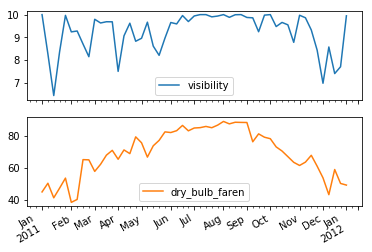

In [68]:
# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_2011_clean[['visibility','dry_bulb_faren']].resample('w').mean() # dry_bulb_faren is the same as temperature

# Print the output of weekly_mean.corr()
print(weekly_mean.corr())

# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()

Use a box plot to visualize the fraction of days that are sunny.  

Resample 'sky_condition' column appropriately to extract the number of sunny hours in a day and the number of total hours. Then divide the number of sunny hours by the number of total hours, and generate a box plot of the resulting fraction.


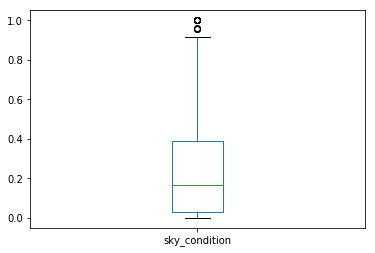

In [69]:
# Create a Boolean Series for sunny days: sunny
sunny = df_2011_clean['sky_condition']== 'CLR'

# Resample the Boolean Series by day and compute the sum: sunny_hours
sunny_hours = sunny.resample('D').sum()

# Resample the Boolean Series by day and compute the count: total_hours
total_hours = sunny.resample('D').count()

# Divide sunny_hours by total_hours: sunny_fraction
sunny_fraction = sunny_hours / total_hours

# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

In [31]:
sunny_fraction.describe()

count    365.000000
mean       0.252712
std        0.271553
min        0.000000
25%        0.029412
50%        0.166667
75%        0.387097
max        1.000000
Name: sky_condition, dtype: float64

explore the maximum temperature and dew point of each month. The columns of interest are 'dew_point_faren' and 'dry_bulb_faren'. After resampling them appropriately to get the maximum temperature and dew point in each month, generate a histogram of these values as subplots.

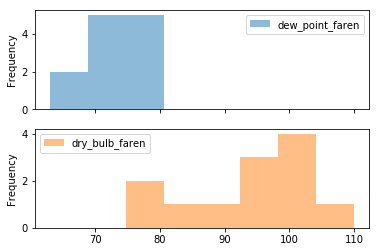

In [70]:
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = df_2011_clean[['dew_point_faren', 'dry_bulb_faren']].resample('M').max()

# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind='hist', bins=8, alpha=0.5, subplots=True)

# Show the plot
plt.show()

The maximum dew point is above 65 every month!

We already know that 2011 was hotter than the climate normals for the previous thirty years. Lets compare the maximum temperature in August 2011 against that of the August 2010 climate normals. More specifically, use CDF plot to determine the probability of the 2011 daily maximum temperature in August being above the 2010 climate normal value. 

Select the maximum temperature in August in df_climate, and then maximum daily temperatures in August 2011. Filter out the days in August 2011 that were above the August 2010 maximum, and use this to construct a CDF plot.

95.3


D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


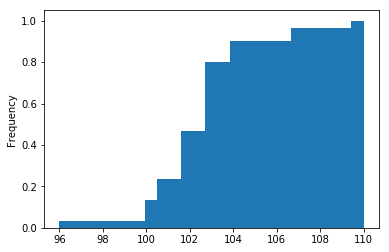

In [71]:
# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = df_2010.loc['2010-Aug', 'Temperature'].max()
print(august_max)

# Resample the August 2011 temperatures in df_clean by day and aggregate the maximum value: august_2011
august_2011 = df_2011_clean.loc['2011-Aug','dry_bulb_faren'].resample('D').max()


# Filter out days in august_2011 where the value exceeded august_max: august_2011_high
august_2011_high = august_2011.loc[august_2011 > august_max]


# Construct a CDF of august_2011_high
august_2011_high.plot(kind='hist',normed = True, cumulative = True, bins = 25)

# Display the plot
plt.show()

Notice how it shows that there was a 50% probability of the 2011 daily maximum temperature in August being 5 degrees above the 2010 climate normal value!